## Sobre o desafio

De acordo com o que foi ensinado no módulo, iremos trabalhar com previsões de vendas de uma loja. O dicionário disponibilizado não é difícil de entender, porém deveremos contar com as implementações que vimos no módulo para:

- Tratar os dados
- Formatar (se necessário)
- Treinar o modelo
- Prever a venda de dezembro
- Montar um histograma dos dados
- Montar um plot de scatter

In [55]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [97]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [98]:
# Criar Dataframe de vendas
df_vendas = pd.DataFrame.from_dict(dados_vendas)

In [99]:
# Visualizar o DF
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     12 non-null     object
 1   vendas  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [100]:
# Remover a coluna mes (texto)
df_vendas.drop(columns=['mes'], axis=1, inplace=True)

# Adiconar uma coluna pra representar o mês em número
df_vendas['mes_numero'] = range(1, 13)

In [101]:
# Criar modelos de testes e treinamento
X = df_vendas[['mes_numero']]
y = df_vendas['vendas']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=1)

In [102]:
# Treinar o algoritmo de Regressão Linear
model= LinearRegression().fit(X_train, y_train)

In [103]:
# Fazer previsões e analisar o modelo
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [104]:
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score :{r2}")

Mean Absolute Error: 44.44444444444444
R2 Score :0.9620786516853933


In [105]:
print(f"Intercepto: {model.intercept_}")
print(f"Coeficiente: {model.coef_}")

Intercepto: 2100.0
Coeficiente: [100.]


In [108]:
# Prever as vendas do mês de dezembro
previsao_dezembro = model.predict([[12]])
print(f"Previsão de vendas para Dezembro: {round(previsao_dezembro[0], 2)}")

Previsão de vendas para Dezembro: 3300.0


c:\Users\felipe\.virtualenvs\modelo_diabetes-5I601UFi\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


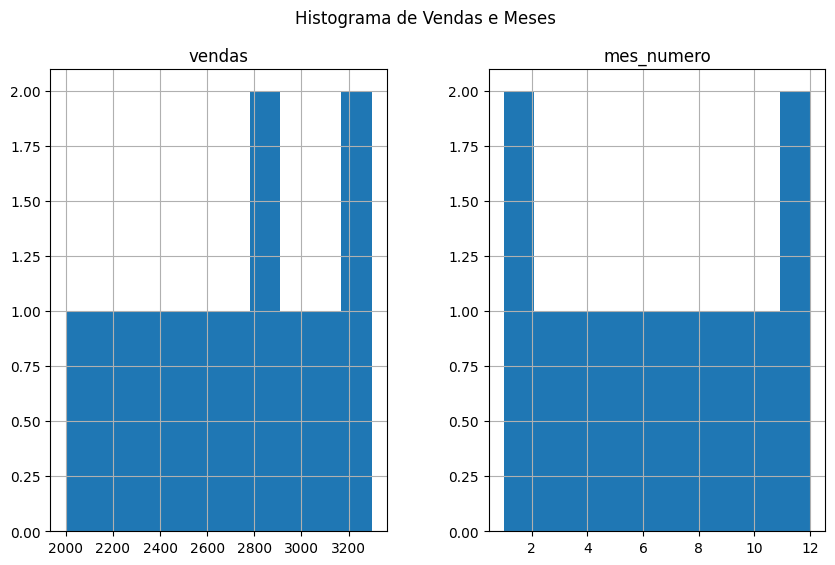

In [116]:
# Histograma da variáveis
df_vendas.hist(figsize=(10,6), grid=True)
plt.suptitle('Histograma de Vendas e Meses')
plt.show()

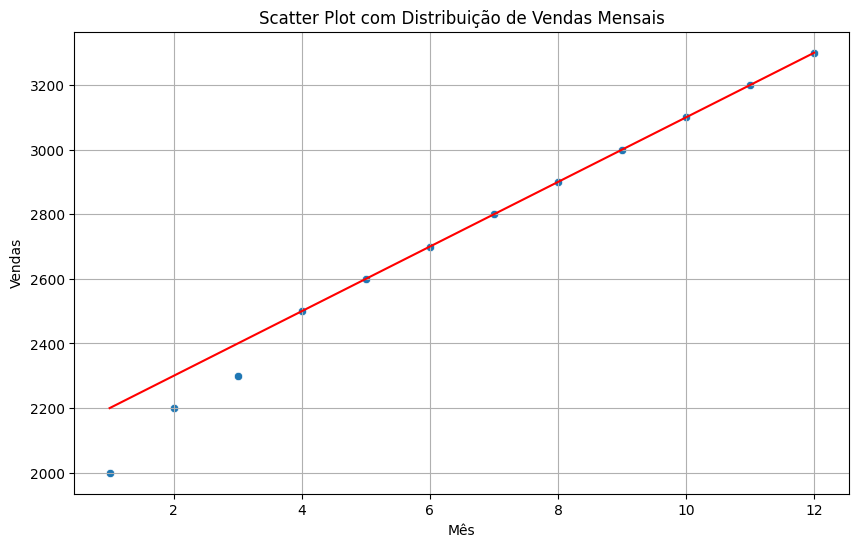

In [117]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mes_numero', y='vendas', data=df_vendas)
plt.plot(df_vendas['mes_numero'], model.predict(df_vendas[['mes_numero']]), color='red')
plt.title('Scatter Plot com Distribuição de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()